In [1]:
import numpy as np
import scipy.stats as s
import pandas as pd

In [2]:
raw_data = pd.read_csv("../DataSets/binianmalignent.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
raw_data.drop(labels=[raw_data.columns[0],raw_data.columns[32]],axis=1,inplace=True)

In [6]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
raw_data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [8]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
C = raw_data['diagnosis']

In [10]:
C

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
training_data = raw_data.iloc[0:int(0.75*raw_data.shape[0])]

In [12]:
testing_data = raw_data.iloc[int(0.75*raw_data.shape[0]):]

In [13]:
training_data.drop(['diagnosis'],axis=1,inplace=True)

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
training_data['bias'] = np.ones((training_data.shape[0],1))

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
training_data.shape

(426, 31)

In [16]:
C_train = C[0:int(0.75*raw_data.shape[0])]

In [17]:
C_test = C[int(0.75*raw_data.shape[0]):]

In [18]:
C_train = np.array(C_train)

In [19]:
C_test = np.array(C_test)

In [20]:
def sigmoid(previous_activation,current_thetas):
    
    dot_product = np.matmul(previous_activation,current_thetas)
    
    return 1/(1+np.exp(-dot_product))

In [21]:
neurons = [31,31,31,1]

In [22]:
l1_thetas_old = np.random.randn(neurons[0],neurons[1])

l2_thetas_old = np.random.randn(neurons[1],neurons[2])

l3_thetas_old = np.random.randn(neurons[2],neurons[3])

In [23]:
alpha = 0.001

epsilon = 0.0001

i = 0

batch_size = 32

neg_log_likeli_history = [0]

iterations = [0]

while(i<5000):
    
    index = np.random.randint(0,training_data.shape[0],size=(32,))
    
    l0_activation = np.array(training_data.iloc[index])
    
    l1_activation = sigmoid(l0_activation,l1_thetas_old)
    
    del1_forward = np.matmul(l0_activation.T,(l1_activation*(1-l1_activation))) 
    
    l2_activation = sigmoid(l1_activation,l2_thetas_old)
    
    del2_forward = np.matmul(l1_activation.T,(l2_activation*(1-l2_activation)))
    
    l3_activation = sigmoid(l2_activation,l3_thetas_old)
    
    del3_forward = np.matmul(l2_activation.T,(l3_activation*(1-l3_activation)))
    
    
    
    
    E = np.mean(l3_activation - C_train[index])
    
    del2_reverse = E*l3_thetas_old
    
    del1_reverse = np.matmul(l2_thetas_old,del2_reverse)
    
    
    
    
    l1_thetas_new = l1_thetas_old - alpha*(del1_forward*del1_reverse.T)
    
    l2_thetas_new = l2_thetas_old - alpha*(del2_forward*del2_reverse.T)
    
    l3_thetas_new = l3_thetas_old - alpha*(del3_forward*E)
    
    
    
    
    neg_log_likeli_old = -(np.matmul(C_train[index].T,np.log(l3_activation)) + np.matmul((1-C_train[index]).T,np.log(1-l3_activation)))
    
    neg_log_likeli_history.append(neg_log_likeli_old)
    
    i+=1
    
    iterations.append(i)
    
        
        
        
    l1_thetas_old = l1_thetas_new
    
    l2_thetas_old = l2_thetas_new
    
    l3_thetas_old = l3_thetas_new
    
    print("The value of Avg Negative Log Likelihood Loss at iteration # {} is {}".format(iterations[i],neg_log_likeli_history[i]))

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


The value of Avg Negative Log Likelihood Loss at iteration # 1 is [27.86880973]
The value of Avg Negative Log Likelihood Loss at iteration # 2 is [22.30689749]
The value of Avg Negative Log Likelihood Loss at iteration # 3 is [21.82491092]
The value of Avg Negative Log Likelihood Loss at iteration # 4 is [22.72041236]
The value of Avg Negative Log Likelihood Loss at iteration # 5 is [21.69278214]
The value of Avg Negative Log Likelihood Loss at iteration # 6 is [22.70032931]
The value of Avg Negative Log Likelihood Loss at iteration # 7 is [22.23076432]
The value of Avg Negative Log Likelihood Loss at iteration # 8 is [23.02336375]
The value of Avg Negative Log Likelihood Loss at iteration # 9 is [20.97818262]
The value of Avg Negative Log Likelihood Loss at iteration # 10 is [21.37015031]
The value of Avg Negative Log Likelihood Loss at iteration # 11 is [22.38243053]
The value of Avg Negative Log Likelihood Loss at iteration # 12 is [26.19534908]
The value of Avg Negative Log Likelih

The value of Avg Negative Log Likelihood Loss at iteration # 198 is [21.35321697]
The value of Avg Negative Log Likelihood Loss at iteration # 199 is [22.58614364]
The value of Avg Negative Log Likelihood Loss at iteration # 200 is [21.93281167]
The value of Avg Negative Log Likelihood Loss at iteration # 201 is [22.2065587]
The value of Avg Negative Log Likelihood Loss at iteration # 202 is [22.80421653]
The value of Avg Negative Log Likelihood Loss at iteration # 203 is [22.14389693]
The value of Avg Negative Log Likelihood Loss at iteration # 204 is [22.33300972]
The value of Avg Negative Log Likelihood Loss at iteration # 205 is [21.95605304]
The value of Avg Negative Log Likelihood Loss at iteration # 206 is [21.40831359]
The value of Avg Negative Log Likelihood Loss at iteration # 207 is [21.9307589]
The value of Avg Negative Log Likelihood Loss at iteration # 208 is [21.45128799]
The value of Avg Negative Log Likelihood Loss at iteration # 209 is [21.76600025]
The value of Avg N

The value of Avg Negative Log Likelihood Loss at iteration # 346 is [21.19671564]
The value of Avg Negative Log Likelihood Loss at iteration # 347 is [19.44174139]
The value of Avg Negative Log Likelihood Loss at iteration # 348 is [21.68210527]
The value of Avg Negative Log Likelihood Loss at iteration # 349 is [24.14366308]
The value of Avg Negative Log Likelihood Loss at iteration # 350 is [20.41968865]
The value of Avg Negative Log Likelihood Loss at iteration # 351 is [20.74051611]
The value of Avg Negative Log Likelihood Loss at iteration # 352 is [22.11643087]
The value of Avg Negative Log Likelihood Loss at iteration # 353 is [23.39916611]
The value of Avg Negative Log Likelihood Loss at iteration # 354 is [21.61529809]
The value of Avg Negative Log Likelihood Loss at iteration # 355 is [21.98544878]
The value of Avg Negative Log Likelihood Loss at iteration # 356 is [24.20555647]
The value of Avg Negative Log Likelihood Loss at iteration # 357 is [21.5482482]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 529 is [21.34197886]
The value of Avg Negative Log Likelihood Loss at iteration # 530 is [23.25020128]
The value of Avg Negative Log Likelihood Loss at iteration # 531 is [22.43175197]
The value of Avg Negative Log Likelihood Loss at iteration # 532 is [20.84031257]
The value of Avg Negative Log Likelihood Loss at iteration # 533 is [21.33414996]
The value of Avg Negative Log Likelihood Loss at iteration # 534 is [22.28272959]
The value of Avg Negative Log Likelihood Loss at iteration # 535 is [22.24351294]
The value of Avg Negative Log Likelihood Loss at iteration # 536 is [21.65306975]
The value of Avg Negative Log Likelihood Loss at iteration # 537 is [21.3513184]
The value of Avg Negative Log Likelihood Loss at iteration # 538 is [21.62867045]
The value of Avg Negative Log Likelihood Loss at iteration # 539 is [21.29812933]
The value of Avg Negative Log Likelihood Loss at iteration # 540 is [23.01839699]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 689 is [22.13756095]
The value of Avg Negative Log Likelihood Loss at iteration # 690 is [22.05197234]
The value of Avg Negative Log Likelihood Loss at iteration # 691 is [22.4353185]
The value of Avg Negative Log Likelihood Loss at iteration # 692 is [21.95720079]
The value of Avg Negative Log Likelihood Loss at iteration # 693 is [21.90909727]
The value of Avg Negative Log Likelihood Loss at iteration # 694 is [21.93466355]
The value of Avg Negative Log Likelihood Loss at iteration # 695 is [21.81647399]
The value of Avg Negative Log Likelihood Loss at iteration # 696 is [20.96891845]
The value of Avg Negative Log Likelihood Loss at iteration # 697 is [21.63583469]
The value of Avg Negative Log Likelihood Loss at iteration # 698 is [23.52179046]
The value of Avg Negative Log Likelihood Loss at iteration # 699 is [21.47898364]
The value of Avg Negative Log Likelihood Loss at iteration # 700 is [22.03339143]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 857 is [21.27011773]
The value of Avg Negative Log Likelihood Loss at iteration # 858 is [22.7206892]
The value of Avg Negative Log Likelihood Loss at iteration # 859 is [21.94939416]
The value of Avg Negative Log Likelihood Loss at iteration # 860 is [22.25750952]
The value of Avg Negative Log Likelihood Loss at iteration # 861 is [21.9356116]
The value of Avg Negative Log Likelihood Loss at iteration # 862 is [22.21848416]
The value of Avg Negative Log Likelihood Loss at iteration # 863 is [22.19474174]
The value of Avg Negative Log Likelihood Loss at iteration # 864 is [22.4231024]
The value of Avg Negative Log Likelihood Loss at iteration # 865 is [21.7199804]
The value of Avg Negative Log Likelihood Loss at iteration # 866 is [22.16667783]
The value of Avg Negative Log Likelihood Loss at iteration # 867 is [21.2684248]
The value of Avg Negative Log Likelihood Loss at iteration # 868 is [23.29810236]
The value of Avg Nega

The value of Avg Negative Log Likelihood Loss at iteration # 1031 is [22.72714267]
The value of Avg Negative Log Likelihood Loss at iteration # 1032 is [20.70712207]
The value of Avg Negative Log Likelihood Loss at iteration # 1033 is [22.15277847]
The value of Avg Negative Log Likelihood Loss at iteration # 1034 is [22.65221151]
The value of Avg Negative Log Likelihood Loss at iteration # 1035 is [20.87704158]
The value of Avg Negative Log Likelihood Loss at iteration # 1036 is [21.63126747]
The value of Avg Negative Log Likelihood Loss at iteration # 1037 is [21.19073527]
The value of Avg Negative Log Likelihood Loss at iteration # 1038 is [22.07753294]
The value of Avg Negative Log Likelihood Loss at iteration # 1039 is [21.71409391]
The value of Avg Negative Log Likelihood Loss at iteration # 1040 is [20.88121088]
The value of Avg Negative Log Likelihood Loss at iteration # 1041 is [22.60734051]
The value of Avg Negative Log Likelihood Loss at iteration # 1042 is [21.61687579]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 1197 is [23.95339992]
The value of Avg Negative Log Likelihood Loss at iteration # 1198 is [22.35894206]
The value of Avg Negative Log Likelihood Loss at iteration # 1199 is [22.05579448]
The value of Avg Negative Log Likelihood Loss at iteration # 1200 is [20.96631215]
The value of Avg Negative Log Likelihood Loss at iteration # 1201 is [21.70846576]
The value of Avg Negative Log Likelihood Loss at iteration # 1202 is [21.98358593]
The value of Avg Negative Log Likelihood Loss at iteration # 1203 is [20.20289645]
The value of Avg Negative Log Likelihood Loss at iteration # 1204 is [24.14652525]
The value of Avg Negative Log Likelihood Loss at iteration # 1205 is [22.04355085]
The value of Avg Negative Log Likelihood Loss at iteration # 1206 is [22.875763]
The value of Avg Negative Log Likelihood Loss at iteration # 1207 is [21.41890604]
The value of Avg Negative Log Likelihood Loss at iteration # 1208 is [21.64824282]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 1338 is [21.9403628]
The value of Avg Negative Log Likelihood Loss at iteration # 1339 is [21.93796375]
The value of Avg Negative Log Likelihood Loss at iteration # 1340 is [21.64551736]
The value of Avg Negative Log Likelihood Loss at iteration # 1341 is [21.03534657]
The value of Avg Negative Log Likelihood Loss at iteration # 1342 is [23.67705726]
The value of Avg Negative Log Likelihood Loss at iteration # 1343 is [22.43464991]
The value of Avg Negative Log Likelihood Loss at iteration # 1344 is [22.37517366]
The value of Avg Negative Log Likelihood Loss at iteration # 1345 is [22.13655068]
The value of Avg Negative Log Likelihood Loss at iteration # 1346 is [21.57820223]
The value of Avg Negative Log Likelihood Loss at iteration # 1347 is [21.03600347]
The value of Avg Negative Log Likelihood Loss at iteration # 1348 is [22.22663004]
The value of Avg Negative Log Likelihood Loss at iteration # 1349 is [19.77244772]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1499 is [24.68805233]
The value of Avg Negative Log Likelihood Loss at iteration # 1500 is [22.58605981]
The value of Avg Negative Log Likelihood Loss at iteration # 1501 is [21.93309718]
The value of Avg Negative Log Likelihood Loss at iteration # 1502 is [21.10531514]
The value of Avg Negative Log Likelihood Loss at iteration # 1503 is [22.68124203]
The value of Avg Negative Log Likelihood Loss at iteration # 1504 is [20.81524823]
The value of Avg Negative Log Likelihood Loss at iteration # 1505 is [21.28222789]
The value of Avg Negative Log Likelihood Loss at iteration # 1506 is [23.23741109]
The value of Avg Negative Log Likelihood Loss at iteration # 1507 is [20.74528944]
The value of Avg Negative Log Likelihood Loss at iteration # 1508 is [22.06331463]
The value of Avg Negative Log Likelihood Loss at iteration # 1509 is [22.73807887]
The value of Avg Negative Log Likelihood Loss at iteration # 1510 is [20.4438046]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1697 is [21.36728695]
The value of Avg Negative Log Likelihood Loss at iteration # 1698 is [22.2546698]
The value of Avg Negative Log Likelihood Loss at iteration # 1699 is [20.78412318]
The value of Avg Negative Log Likelihood Loss at iteration # 1700 is [22.05379872]
The value of Avg Negative Log Likelihood Loss at iteration # 1701 is [21.62293891]
The value of Avg Negative Log Likelihood Loss at iteration # 1702 is [20.94233616]
The value of Avg Negative Log Likelihood Loss at iteration # 1703 is [22.74207779]
The value of Avg Negative Log Likelihood Loss at iteration # 1704 is [21.47447209]
The value of Avg Negative Log Likelihood Loss at iteration # 1705 is [20.65835715]
The value of Avg Negative Log Likelihood Loss at iteration # 1706 is [20.01782674]
The value of Avg Negative Log Likelihood Loss at iteration # 1707 is [21.72341119]
The value of Avg Negative Log Likelihood Loss at iteration # 1708 is [20.28349027]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1893 is [23.18252964]
The value of Avg Negative Log Likelihood Loss at iteration # 1894 is [23.05328933]
The value of Avg Negative Log Likelihood Loss at iteration # 1895 is [21.24546886]
The value of Avg Negative Log Likelihood Loss at iteration # 1896 is [22.00169246]
The value of Avg Negative Log Likelihood Loss at iteration # 1897 is [22.35535262]
The value of Avg Negative Log Likelihood Loss at iteration # 1898 is [20.26140045]
The value of Avg Negative Log Likelihood Loss at iteration # 1899 is [20.80311732]
The value of Avg Negative Log Likelihood Loss at iteration # 1900 is [22.49787106]
The value of Avg Negative Log Likelihood Loss at iteration # 1901 is [21.30126191]
The value of Avg Negative Log Likelihood Loss at iteration # 1902 is [21.2082692]
The value of Avg Negative Log Likelihood Loss at iteration # 1903 is [22.04415661]
The value of Avg Negative Log Likelihood Loss at iteration # 1904 is [20.01132967]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2050 is [21.9396015]
The value of Avg Negative Log Likelihood Loss at iteration # 2051 is [21.64281095]
The value of Avg Negative Log Likelihood Loss at iteration # 2052 is [20.41711024]
The value of Avg Negative Log Likelihood Loss at iteration # 2053 is [20.48681796]
The value of Avg Negative Log Likelihood Loss at iteration # 2054 is [21.6222697]
The value of Avg Negative Log Likelihood Loss at iteration # 2055 is [21.620596]
The value of Avg Negative Log Likelihood Loss at iteration # 2056 is [23.3526008]
The value of Avg Negative Log Likelihood Loss at iteration # 2057 is [20.57907745]
The value of Avg Negative Log Likelihood Loss at iteration # 2058 is [19.70926323]
The value of Avg Negative Log Likelihood Loss at iteration # 2059 is [22.12103994]
The value of Avg Negative Log Likelihood Loss at iteration # 2060 is [20.740071]
The value of Avg Negative Log Likelihood Loss at iteration # 2061 is [23.52292803]
The value o

The value of Avg Negative Log Likelihood Loss at iteration # 2223 is [21.68018607]
The value of Avg Negative Log Likelihood Loss at iteration # 2224 is [21.1345578]
The value of Avg Negative Log Likelihood Loss at iteration # 2225 is [21.32363603]
The value of Avg Negative Log Likelihood Loss at iteration # 2226 is [22.04068612]
The value of Avg Negative Log Likelihood Loss at iteration # 2227 is [20.65714717]
The value of Avg Negative Log Likelihood Loss at iteration # 2228 is [23.66154153]
The value of Avg Negative Log Likelihood Loss at iteration # 2229 is [21.04189236]
The value of Avg Negative Log Likelihood Loss at iteration # 2230 is [21.96064528]
The value of Avg Negative Log Likelihood Loss at iteration # 2231 is [20.63800404]
The value of Avg Negative Log Likelihood Loss at iteration # 2232 is [22.84036661]
The value of Avg Negative Log Likelihood Loss at iteration # 2233 is [21.28833358]
The value of Avg Negative Log Likelihood Loss at iteration # 2234 is [20.55115688]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2403 is [20.60973485]
The value of Avg Negative Log Likelihood Loss at iteration # 2404 is [22.7812305]
The value of Avg Negative Log Likelihood Loss at iteration # 2405 is [20.25566225]
The value of Avg Negative Log Likelihood Loss at iteration # 2406 is [22.43306848]
The value of Avg Negative Log Likelihood Loss at iteration # 2407 is [21.61501645]
The value of Avg Negative Log Likelihood Loss at iteration # 2408 is [20.86697471]
The value of Avg Negative Log Likelihood Loss at iteration # 2409 is [20.80628072]
The value of Avg Negative Log Likelihood Loss at iteration # 2410 is [22.05960745]
The value of Avg Negative Log Likelihood Loss at iteration # 2411 is [22.85347844]
The value of Avg Negative Log Likelihood Loss at iteration # 2412 is [20.61199909]
The value of Avg Negative Log Likelihood Loss at iteration # 2413 is [22.84573596]
The value of Avg Negative Log Likelihood Loss at iteration # 2414 is [21.25726978]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2502 is [23.04673035]
The value of Avg Negative Log Likelihood Loss at iteration # 2503 is [21.5497555]
The value of Avg Negative Log Likelihood Loss at iteration # 2504 is [22.39748458]
The value of Avg Negative Log Likelihood Loss at iteration # 2505 is [21.9385593]
The value of Avg Negative Log Likelihood Loss at iteration # 2506 is [22.14708187]
The value of Avg Negative Log Likelihood Loss at iteration # 2507 is [21.33984752]
The value of Avg Negative Log Likelihood Loss at iteration # 2508 is [21.67825849]
The value of Avg Negative Log Likelihood Loss at iteration # 2509 is [22.73193754]
The value of Avg Negative Log Likelihood Loss at iteration # 2510 is [22.32490401]
The value of Avg Negative Log Likelihood Loss at iteration # 2511 is [21.73070296]
The value of Avg Negative Log Likelihood Loss at iteration # 2512 is [22.15981238]
The value of Avg Negative Log Likelihood Loss at iteration # 2513 is [22.36559291]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2691 is [21.61494552]
The value of Avg Negative Log Likelihood Loss at iteration # 2692 is [20.86391952]
The value of Avg Negative Log Likelihood Loss at iteration # 2693 is [20.39774809]
The value of Avg Negative Log Likelihood Loss at iteration # 2694 is [23.50626308]
The value of Avg Negative Log Likelihood Loss at iteration # 2695 is [20.85554146]
The value of Avg Negative Log Likelihood Loss at iteration # 2696 is [20.53934279]
The value of Avg Negative Log Likelihood Loss at iteration # 2697 is [21.6348344]
The value of Avg Negative Log Likelihood Loss at iteration # 2698 is [21.63040407]
The value of Avg Negative Log Likelihood Loss at iteration # 2699 is [21.19139758]
The value of Avg Negative Log Likelihood Loss at iteration # 2700 is [19.48383059]
The value of Avg Negative Log Likelihood Loss at iteration # 2701 is [19.70155694]
The value of Avg Negative Log Likelihood Loss at iteration # 2702 is [23.41395405]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2875 is [22.57398968]
The value of Avg Negative Log Likelihood Loss at iteration # 2876 is [20.44892274]
The value of Avg Negative Log Likelihood Loss at iteration # 2877 is [22.2971275]
The value of Avg Negative Log Likelihood Loss at iteration # 2878 is [21.00756935]
The value of Avg Negative Log Likelihood Loss at iteration # 2879 is [22.66970925]
The value of Avg Negative Log Likelihood Loss at iteration # 2880 is [20.70897481]
The value of Avg Negative Log Likelihood Loss at iteration # 2881 is [20.89154276]
The value of Avg Negative Log Likelihood Loss at iteration # 2882 is [21.6157554]
The value of Avg Negative Log Likelihood Loss at iteration # 2883 is [20.82977947]
The value of Avg Negative Log Likelihood Loss at iteration # 2884 is [21.19995507]
The value of Avg Negative Log Likelihood Loss at iteration # 2885 is [22.48973035]
The value of Avg Negative Log Likelihood Loss at iteration # 2886 is [21.61584475]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3063 is [20.39259259]
The value of Avg Negative Log Likelihood Loss at iteration # 3064 is [20.85757243]
The value of Avg Negative Log Likelihood Loss at iteration # 3065 is [21.27996351]
The value of Avg Negative Log Likelihood Loss at iteration # 3066 is [20.78062317]
The value of Avg Negative Log Likelihood Loss at iteration # 3067 is [21.63185395]
The value of Avg Negative Log Likelihood Loss at iteration # 3068 is [21.25915655]
The value of Avg Negative Log Likelihood Loss at iteration # 3069 is [20.29350439]
The value of Avg Negative Log Likelihood Loss at iteration # 3070 is [21.72350018]
The value of Avg Negative Log Likelihood Loss at iteration # 3071 is [22.11897296]
The value of Avg Negative Log Likelihood Loss at iteration # 3072 is [21.18606637]
The value of Avg Negative Log Likelihood Loss at iteration # 3073 is [19.9600526]
The value of Avg Negative Log Likelihood Loss at iteration # 3074 is [21.67451375]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 3208 is [19.85045864]
The value of Avg Negative Log Likelihood Loss at iteration # 3209 is [21.17060596]
The value of Avg Negative Log Likelihood Loss at iteration # 3210 is [20.67068476]
The value of Avg Negative Log Likelihood Loss at iteration # 3211 is [22.20273212]
The value of Avg Negative Log Likelihood Loss at iteration # 3212 is [20.20208453]
The value of Avg Negative Log Likelihood Loss at iteration # 3213 is [20.65164831]
The value of Avg Negative Log Likelihood Loss at iteration # 3214 is [25.49851055]
The value of Avg Negative Log Likelihood Loss at iteration # 3215 is [20.39125762]
The value of Avg Negative Log Likelihood Loss at iteration # 3216 is [23.05439036]
The value of Avg Negative Log Likelihood Loss at iteration # 3217 is [21.2189718]
The value of Avg Negative Log Likelihood Loss at iteration # 3218 is [21.61848631]
The value of Avg Negative Log Likelihood Loss at iteration # 3219 is [21.68693295]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 3349 is [21.23406581]
The value of Avg Negative Log Likelihood Loss at iteration # 3350 is [21.22021061]
The value of Avg Negative Log Likelihood Loss at iteration # 3351 is [22.02700085]
The value of Avg Negative Log Likelihood Loss at iteration # 3352 is [21.61532544]
The value of Avg Negative Log Likelihood Loss at iteration # 3353 is [21.22609159]
The value of Avg Negative Log Likelihood Loss at iteration # 3354 is [22.42307776]
The value of Avg Negative Log Likelihood Loss at iteration # 3355 is [20.87462722]
The value of Avg Negative Log Likelihood Loss at iteration # 3356 is [20.8139965]
The value of Avg Negative Log Likelihood Loss at iteration # 3357 is [22.05317109]
The value of Avg Negative Log Likelihood Loss at iteration # 3358 is [19.57733105]
The value of Avg Negative Log Likelihood Loss at iteration # 3359 is [22.1339189]
The value of Avg Negative Log Likelihood Loss at iteration # 3360 is [21.18242896]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3528 is [22.7017558]
The value of Avg Negative Log Likelihood Loss at iteration # 3529 is [22.72604591]
The value of Avg Negative Log Likelihood Loss at iteration # 3530 is [21.3710005]
The value of Avg Negative Log Likelihood Loss at iteration # 3531 is [21.39752324]
The value of Avg Negative Log Likelihood Loss at iteration # 3532 is [21.29437511]
The value of Avg Negative Log Likelihood Loss at iteration # 3533 is [22.31917832]
The value of Avg Negative Log Likelihood Loss at iteration # 3534 is [22.27502027]
The value of Avg Negative Log Likelihood Loss at iteration # 3535 is [20.13451185]
The value of Avg Negative Log Likelihood Loss at iteration # 3536 is [20.84666933]
The value of Avg Negative Log Likelihood Loss at iteration # 3537 is [19.96544295]
The value of Avg Negative Log Likelihood Loss at iteration # 3538 is [20.23749027]
The value of Avg Negative Log Likelihood Loss at iteration # 3539 is [26.71695676]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3700 is [21.9312668]
The value of Avg Negative Log Likelihood Loss at iteration # 3701 is [21.93100336]
The value of Avg Negative Log Likelihood Loss at iteration # 3702 is [22.19584816]
The value of Avg Negative Log Likelihood Loss at iteration # 3703 is [21.43244652]
The value of Avg Negative Log Likelihood Loss at iteration # 3704 is [22.21134232]
The value of Avg Negative Log Likelihood Loss at iteration # 3705 is [21.40917997]
The value of Avg Negative Log Likelihood Loss at iteration # 3706 is [22.5133328]
The value of Avg Negative Log Likelihood Loss at iteration # 3707 is [21.6749328]
The value of Avg Negative Log Likelihood Loss at iteration # 3708 is [20.58441453]
The value of Avg Negative Log Likelihood Loss at iteration # 3709 is [21.34547125]
The value of Avg Negative Log Likelihood Loss at iteration # 3710 is [21.97594222]
The value of Avg Negative Log Likelihood Loss at iteration # 3711 is [21.96597057]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 3882 is [23.00505633]
The value of Avg Negative Log Likelihood Loss at iteration # 3883 is [22.42262374]
The value of Avg Negative Log Likelihood Loss at iteration # 3884 is [21.61516658]
The value of Avg Negative Log Likelihood Loss at iteration # 3885 is [22.35845981]
The value of Avg Negative Log Likelihood Loss at iteration # 3886 is [22.64940931]
The value of Avg Negative Log Likelihood Loss at iteration # 3887 is [21.63738635]
The value of Avg Negative Log Likelihood Loss at iteration # 3888 is [21.94448848]
The value of Avg Negative Log Likelihood Loss at iteration # 3889 is [22.24634927]
The value of Avg Negative Log Likelihood Loss at iteration # 3890 is [20.22908428]
The value of Avg Negative Log Likelihood Loss at iteration # 3891 is [20.51055365]
The value of Avg Negative Log Likelihood Loss at iteration # 3892 is [22.0919437]
The value of Avg Negative Log Likelihood Loss at iteration # 3893 is [20.09617828]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4042 is [21.63828677]
The value of Avg Negative Log Likelihood Loss at iteration # 4043 is [21.63327675]
The value of Avg Negative Log Likelihood Loss at iteration # 4044 is [20.67424122]
The value of Avg Negative Log Likelihood Loss at iteration # 4045 is [20.13882657]
The value of Avg Negative Log Likelihood Loss at iteration # 4046 is [21.25159258]
The value of Avg Negative Log Likelihood Loss at iteration # 4047 is [22.06571783]
The value of Avg Negative Log Likelihood Loss at iteration # 4048 is [22.86953607]
The value of Avg Negative Log Likelihood Loss at iteration # 4049 is [22.35181213]
The value of Avg Negative Log Likelihood Loss at iteration # 4050 is [22.36275231]
The value of Avg Negative Log Likelihood Loss at iteration # 4051 is [22.5765368]
The value of Avg Negative Log Likelihood Loss at iteration # 4052 is [22.21184681]
The value of Avg Negative Log Likelihood Loss at iteration # 4053 is [20.95138323]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4193 is [21.94854761]
The value of Avg Negative Log Likelihood Loss at iteration # 4194 is [20.69603582]
The value of Avg Negative Log Likelihood Loss at iteration # 4195 is [21.25249871]
The value of Avg Negative Log Likelihood Loss at iteration # 4196 is [21.6727344]
The value of Avg Negative Log Likelihood Loss at iteration # 4197 is [23.94928013]
The value of Avg Negative Log Likelihood Loss at iteration # 4198 is [22.22866211]
The value of Avg Negative Log Likelihood Loss at iteration # 4199 is [22.20486555]
The value of Avg Negative Log Likelihood Loss at iteration # 4200 is [21.41802704]
The value of Avg Negative Log Likelihood Loss at iteration # 4201 is [20.79672594]
The value of Avg Negative Log Likelihood Loss at iteration # 4202 is [20.60540875]
The value of Avg Negative Log Likelihood Loss at iteration # 4203 is [23.16297339]
The value of Avg Negative Log Likelihood Loss at iteration # 4204 is [23.91974678]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4379 is [21.02125081]
The value of Avg Negative Log Likelihood Loss at iteration # 4380 is [20.93178418]
The value of Avg Negative Log Likelihood Loss at iteration # 4381 is [21.29307325]
The value of Avg Negative Log Likelihood Loss at iteration # 4382 is [22.00675057]
The value of Avg Negative Log Likelihood Loss at iteration # 4383 is [23.54766775]
The value of Avg Negative Log Likelihood Loss at iteration # 4384 is [22.54797541]
The value of Avg Negative Log Likelihood Loss at iteration # 4385 is [20.91657428]
The value of Avg Negative Log Likelihood Loss at iteration # 4386 is [20.97918456]
The value of Avg Negative Log Likelihood Loss at iteration # 4387 is [20.89854489]
The value of Avg Negative Log Likelihood Loss at iteration # 4388 is [21.61531431]
The value of Avg Negative Log Likelihood Loss at iteration # 4389 is [22.78239131]
The value of Avg Negative Log Likelihood Loss at iteration # 4390 is [21.33205425]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4573 is [21.29375772]
The value of Avg Negative Log Likelihood Loss at iteration # 4574 is [19.51676258]
The value of Avg Negative Log Likelihood Loss at iteration # 4575 is [22.50883055]
The value of Avg Negative Log Likelihood Loss at iteration # 4576 is [22.83022718]
The value of Avg Negative Log Likelihood Loss at iteration # 4577 is [20.89991891]
The value of Avg Negative Log Likelihood Loss at iteration # 4578 is [19.66789583]
The value of Avg Negative Log Likelihood Loss at iteration # 4579 is [20.76432374]
The value of Avg Negative Log Likelihood Loss at iteration # 4580 is [22.61434989]
The value of Avg Negative Log Likelihood Loss at iteration # 4581 is [22.06909761]
The value of Avg Negative Log Likelihood Loss at iteration # 4582 is [22.03976608]
The value of Avg Negative Log Likelihood Loss at iteration # 4583 is [22.81680011]
The value of Avg Negative Log Likelihood Loss at iteration # 4584 is [21.61726071]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4756 is [20.23037677]
The value of Avg Negative Log Likelihood Loss at iteration # 4757 is [21.61798702]
The value of Avg Negative Log Likelihood Loss at iteration # 4758 is [20.44977637]
The value of Avg Negative Log Likelihood Loss at iteration # 4759 is [22.96524399]
The value of Avg Negative Log Likelihood Loss at iteration # 4760 is [20.08590117]
The value of Avg Negative Log Likelihood Loss at iteration # 4761 is [19.38540635]
The value of Avg Negative Log Likelihood Loss at iteration # 4762 is [22.23842882]
The value of Avg Negative Log Likelihood Loss at iteration # 4763 is [20.68786963]
The value of Avg Negative Log Likelihood Loss at iteration # 4764 is [20.66831371]
The value of Avg Negative Log Likelihood Loss at iteration # 4765 is [22.20503847]
The value of Avg Negative Log Likelihood Loss at iteration # 4766 is [24.09876017]
The value of Avg Negative Log Likelihood Loss at iteration # 4767 is [22.82877936]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4964 is [21.638814]
The value of Avg Negative Log Likelihood Loss at iteration # 4965 is [20.70527068]
The value of Avg Negative Log Likelihood Loss at iteration # 4966 is [21.25674188]
The value of Avg Negative Log Likelihood Loss at iteration # 4967 is [21.99093151]
The value of Avg Negative Log Likelihood Loss at iteration # 4968 is [21.97822057]
The value of Avg Negative Log Likelihood Loss at iteration # 4969 is [21.96816046]
The value of Avg Negative Log Likelihood Loss at iteration # 4970 is [22.00677824]
The value of Avg Negative Log Likelihood Loss at iteration # 4971 is [21.95376382]
The value of Avg Negative Log Likelihood Loss at iteration # 4972 is [23.55098858]
The value of Avg Negative Log Likelihood Loss at iteration # 4973 is [21.2034595]
The value of Avg Negative Log Likelihood Loss at iteration # 4974 is [21.64919222]
The value of Avg Negative Log Likelihood Loss at iteration # 4975 is [22.52932444]
The val

In [24]:
import matplotlib.pyplot as plt

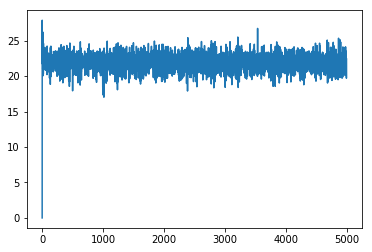

In [25]:
plt.plot(iterations,neg_log_likeli_history)

In [26]:
l0_activation = np.array(training_data)
    
l1_activation = sigmoid(l0_activation,l1_thetas_old)
l2_activation = sigmoid(l1_activation,l2_thetas_old)
    
l3_activation = sigmoid(l2_activation,l3_thetas_old)
l3_activation

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([[0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.39576034],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.41443301],
       [0.414